# XGBoost - Boston Housing

### Load Data
* explore data

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

#### The boston variable is a Dictionary

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [3]:
print(boston.data.shape)

(506, 13)


#### Check the features

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### View the description of the data

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Convert data to a pandas DataFrame
* label the columns

In [6]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Add the target variable, price - available as boston.target

In [8]:
data['PRICE'] = boston.target

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


#### It appears there are no missing values - All variables look to have continuous values
#### More statistics can be viewed using describe( )

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Build and Train the Model

In [11]:
import xgboost as xgb
import numpy as np

from sklearn.metrics import mean_squared_error

#### Use .iloc - split the target feature from the other features

In [12]:
X, y = data.iloc[:, :-1], data.iloc[:,-1]

#### Convert data to a DMatrix
* supported by xgboost
* gives model performance and efficiency gains

In [13]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


#### NOTE - XGBoost has many hyperparameters (which can be tuned)
* learning rate - step-size shrinkage to prevent overfitting
* max depth - determines how deeply each tree can grow during boosting
* subsample - % of sample used per tree
* colsample bytree - % of features used per tree
* n estimators - number of trees to build
* objective - determines loss function to be used

#### XGBoost also has Regularization parameters - gamma, alpha (L1), lambda (L2)
#### Create Training and Test sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Instantiate an XGBoost Regressor Object - using XGBRegressor( )

In [15]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth = 5, alpha = 10, n_estimators = 10)

#### Fit the regressor to the training set - Make Predictions on the test set

In [16]:
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


#### Compute the RMSE

In [17]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

print('RMSE: %f' % (rmse))

RMSE: 10.569356


## K-fold Cross-validation with XGBoost
* used for building more robust models
* all original training set entries, are used for training AND validation (just once each)

#### Several parameters
* nfolds - number of cross validation sets to build
* num boost rounds - number of trees to build (similar to n estimators)
* early stopping rounds - finishes model training early when determined metric (RMSE here) does Not improve over a certain period
* seed - for reproducibility

#### Create a Dictionary - params, which holds hyperparameters

In [19]:
params = {'objective':'reg:linear', 'colsample_bytree': 0.3, 'learning_rate': 0.1,
         'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,
                   early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=123)

In [20]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.652929,0.038264,21.670776,0.072370
1,19.738335,0.096610,19.779675,0.022115
2,17.985388,0.118166,18.077801,0.072426
3,16.475789,0.114711,16.585961,0.104928
4,14.996755,0.104659,15.151255,0.104448


#### Extract and Print - final Boosting round metric

In [22]:
print((cv_results['test-rmse-mean']).tail(1))

49    3.876441
Name: test-rmse-mean, dtype: float64


#### RMSE has reduced in size from 10.57 to 3.88

## Visualize Feature Importance

In [23]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

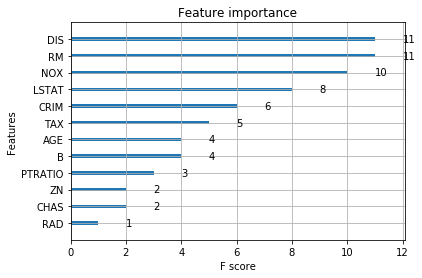

In [25]:
xgb.plot_importance(xg_reg)

plt.rcParams['figure.figsize'] = [5,5]
plt.show()

# CONCLUSION
### Techniques such as Grid Search, Random Search, and Bayesian Optimization may help achieve optimal sets of hyperparameters